#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [1]:
## The marketing airline is the airline that sold the ticket, and the operating carrier is the carrier that actually carried the passenger

# https://en.wikipedia.org/wiki/Codeshare_agreement

In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import random
pd.set_option('display.max_rows', None)

In [3]:
df_fuel = pd.read_csv(r'..\..\csvs\fuel_consumption.csv', sep=',')
df_fuel.head()

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,5100,0.0,5100,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,396216,140239.0,536455,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405,0.0,0.0,0.0,0.0,522405,569497,0.0,569497,2016


In [4]:
df_fuel['unique_carrier'].nunique()

62

In [5]:
# import smaller sample from passengers csv

filename = r'..\..\csvs\passenger_random_sample.csv'
n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 10000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df_passengers = pd.read_csv(filename, skiprows=skip)
df_passengers.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source,op_unique_carrier
0,12,12,374400,1872,1759,0,0,1040,1836,1644,...,United States,6,698,1,2018,7,3,F,DU,G4
1,12,13,648496,2405,1884,0,0,414,1182,895,...,United States,6,721,1,2018,4,1,F,DU,AS
2,12,12,520800,2400,2217,0,0,1674,2693,2433,...,United States,6,699,1,2018,12,4,F,DU,B6
3,12,12,461100,1800,1177,40,0,268,964,569,...,United States,6,694,1,2018,1,1,F,DU,AA
4,12,12,348000,1740,1040,0,0,866,1755,1479,...,United States,6,698,1,2018,1,2,F,DU,NK


In [6]:
df_passengers.shape

(10000, 39)

In [7]:
df_passengers['unique_carrier'].nunique()

28

In [8]:
# import smaller sample from flights csv

filename = r'..\..\csvs\flights_random_sample.csv'
n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 10000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df_flights = pd.read_csv(filename, skiprows=skip)
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,1099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,WN,WN,WN,6445,WN,N903WN,6445,12889,LAS,...,1910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,WN,WN,WN,213,WN,N264LV,213,12889,LAS,...,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,AA,AA,AA,2335,AA,N933NN,2335,13930,ORD,...,802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,AA,AA_CODESHARE,AA,4954,PT,N640AE,4954,14100,PHL,...,515,4.0,0.0,16.0,0.0,3.0,NaN,NaN,NaN,NaN


In [9]:
df_flights.shape

(10000, 42)

In [10]:
df_flights['op_unique_carrier'].nunique()

27

In [11]:
# merge_df = pd.merge(df_flights, df_passengers, how = 'left', left_on='op_unique_carrier', right_on='unique_carrier')

Step 1 - Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)


In [12]:
df_flights = df_flights.dropna(thresh=df_flights.shape[0]*0.6,axis=1)

In [13]:
df_flights.shape

(10000, 32)

In [14]:
df_flights.isnull().sum()

fl_date                  0
mkt_unique_carrier       0
branded_code_share       0
mkt_carrier              0
mkt_carrier_fl_num       0
op_unique_carrier        0
tail_num                22
op_carrier_fl_num        0
origin_airport_id        0
origin                   0
origin_city_name         0
dest_airport_id          0
dest                     0
dest_city_name           0
crs_dep_time             0
dep_time               177
dep_delay              181
taxi_out               191
wheels_off             191
wheels_on              192
taxi_in                192
crs_arr_time             0
arr_time               187
arr_delay              206
cancelled                0
diverted                 0
dup                      0
crs_elapsed_time         0
actual_elapsed_time    204
air_time               209
flights                  0
distance                 0
dtype: int64

In [15]:
df_flights = df_flights.dropna()
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,1111.0,-9.0,0,0,N,150,145.0,132.0,1,1099
1,2018-01-01,WN,WN,WN,6445,WN,N903WN,6445,12889,LAS,...,14.0,-1.0,0,0,N,245,234.0,219.0,1,1910
2,2018-01-01,WN,WN,WN,213,WN,N264LV,213,12889,LAS,...,1850.0,10.0,0,0,N,80,67.0,55.0,1,345
3,2018-01-01,AA,AA,AA,2335,AA,N933NN,2335,13930,ORD,...,1535.0,-10.0,0,0,N,152,140.0,115.0,1,802
4,2018-01-01,AA,AA_CODESHARE,AA,4954,PT,N640AE,4954,14100,PHL,...,2015.0,23.0,0,0,N,122,138.0,89.0,1,515


In [16]:
df_flights.shape

(9786, 32)

In [17]:
# extract month from flight date

df_flights['month'] = pd.DatetimeIndex(df_flights['fl_date']).month
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,month
0,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,-9.0,0,0,N,150,145.0,132.0,1,1099,1
1,2018-01-01,WN,WN,WN,6445,WN,N903WN,6445,12889,LAS,...,-1.0,0,0,N,245,234.0,219.0,1,1910,1
2,2018-01-01,WN,WN,WN,213,WN,N264LV,213,12889,LAS,...,10.0,0,0,N,80,67.0,55.0,1,345,1
3,2018-01-01,AA,AA,AA,2335,AA,N933NN,2335,13930,ORD,...,-10.0,0,0,N,152,140.0,115.0,1,802,1
4,2018-01-01,AA,AA_CODESHARE,AA,4954,PT,N640AE,4954,14100,PHL,...,23.0,0,0,N,122,138.0,89.0,1,515,1


In [18]:
# get sum of delay per month per carrier

filter = df_flights[['month','op_unique_carrier','arr_delay']] 
carrier_delay_monthly = filter.groupby(['op_unique_carrier','month']).sum('arr_delay')
carrier_delay_monthly.head(20)

arr_delay
op_unique_carrier month           
9E                1            6.0
                  2         -308.0
                  3          -20.0
                  4          265.0
                  5           39.0
                  6          249.0
                  7           22.0
                  8          773.0
                  9         -212.0
                  10        -102.0
                  11         -77.0
                  12         428.0
9K                3          -20.0
                  5           -5.0
AA                1          124.0
                  2          519.0
                  3          320.0
                  4          768.0
                  5         1643.0
                  6          137.0

In [19]:
# get average monthly delay per carrier

avg_monthly_delay = carrier_delay_monthly.groupby('op_unique_carrier').mean('arr_delay').reset_index()
avg_monthly_delay

,op_unique_carrier,arr_delay
0,9E,88.583333
1,9K,-12.500000
2,AA,469.416667
3,AS,63.500000
4,AX,74.181818
5,B6,327.833333
6,C5,33.166667
7,CP,21.333333
8,DL,81.500000
9,EM,50.000000


Step 2 - Find out distance covered monthly by different air carriers

In [20]:
# get distance per month per carrier

filter = df_flights[['month','op_unique_carrier','distance']] 
carrier_distance_monthly = filter.groupby(['op_unique_carrier','month']).sum('distance')
carrier_distance_monthly.head(20)

distance
op_unique_carrier month          
9E                1         15962
                  2         11161
                  3          8403
                  4          8228
                  5          8076
                  6         16997
                  7          7737
                  8         16242
                  9         16105
                  10        10857
                  11        10691
                  12        16299
9K                3           258
                  5           129
AA                1        104325
                  2        102032
                  3        118835
                  4         99140
                  5         96274
                  6         94390

In [21]:
# get average monthly distance per carrier

avg_monthly_distance = carrier_distance_monthly.groupby('op_unique_carrier').mean('distance').reset_index()
avg_monthly_distance

,op_unique_carrier,distance
0,9E,12229.833333
1,9K,193.500000
2,AA,105810.000000
3,AS,26950.416667
4,AX,3490.909091
5,B6,41138.166667
6,C5,1677.083333
7,CP,5114.250000
8,DL,100329.833333
9,EM,198.000000


Step 3 - Find out number of passengers that were carried by different air carriers

In [22]:
sum(df_passengers.isnull().sum())

0

In [23]:
# only look at passengers for carriers included in the flights dataset

carriers = list(df_flights['op_unique_carrier'].unique())
filter = df_passengers[df_passengers['unique_carrier'].isin(carriers)]
filter['unique_carrier'].nunique()

27

In [24]:
# get passengers per month per carrier

filter = filter[['month','unique_carrier','passengers']]
carrier_passengers_monthly = filter.groupby(['unique_carrier','month']).sum('passengers')
carrier_passengers_monthly.head(20)

passengers
unique_carrier month            
9E             1           38155
               2           31094
               3           29119
               4           27088
               5           47161
               6           24311
               7           36376
               8           29201
               9           39383
               10          39549
               11          28257
               12          31622
9K             1            1209
               2            2463
               3             754
               4            1043
               5            2142
               6            2157
               7            1357
               8            5191

In [25]:
# get average monthly passengers per carrier

avg_monthly_passengers = carrier_passengers_monthly.groupby('unique_carrier').mean('passengers').reset_index()
avg_monthly_passengers

,unique_carrier,passengers
0,9E,33443.000000
1,9K,1765.000000
2,AA,382748.000000
3,AS,89755.500000
4,AX,9072.833333
5,B6,137095.333333
6,C5,5119.666667
7,CP,12185.500000
8,DL,416668.333333
9,EM,14.500000


Step 4: Find out total fuel comsumption per air carrier.

In [26]:
df_fuel.shape

(3035, 25)

In [27]:
df_fuel.isnull().sum()

month                0
airline_id           1
unique_carrier       1
carrier              0
carrier_name         1
carrier_group_new    0
sdomt_gallons        1
satl_gallons         1
spac_gallons         1
slat_gallons         2
sint_gallons         1
ts_gallons           1
tdomt_gallons        3
tint_gallons         1
total_gallons        6
sdomt_cost           0
satl_cost            1
spac_cost            1
slat_cost            1
sint_cost            1
ts_cost              0
tdomt_cost           0
tint_cost            1
total_cost           0
year                 0
dtype: int64

In [28]:
df_fuel.dropna(inplace=True)

In [29]:
df_fuel.shape

(3025, 25)

In [30]:
df_fuel['total_gallons'].describe()

count    3.025000e+03
mean     2.848810e+07
std      7.029138e+07
min      0.000000e+00
25%      7.138500e+04
50%      5.638650e+05
75%      1.546017e+07
max      3.511331e+08
Name: total_gallons, dtype: float64

In [31]:
df_fuel = df_fuel.replace({'total_gallons' : {0.000000e+00: 2.848810e+07}})
df_fuel['total_gallons'].describe()

count    3.025000e+03
mean     3.433640e+07
std      6.884767e+07
min      1.581000e+03
25%      4.393290e+05
50%      7.745919e+06
75%      2.848810e+07
max      3.511331e+08
Name: total_gallons, dtype: float64

In [32]:
# only look at fuel for carriers included in the flights/passengers datasets

carriers = list(df_flights['op_unique_carrier'].unique())
filter = df_fuel[df_fuel['unique_carrier'].isin(carriers)]
filter = filter[filter['year'].isin([2017,2018])]
filter.shape

(492, 25)

In [33]:
df_fuel.columns

Index(['month', 'airline_id', 'unique_carrier', 'carrier', 'carrier_name',
       'carrier_group_new', 'sdomt_gallons', 'satl_gallons', 'spac_gallons',
       'slat_gallons', 'sint_gallons', 'ts_gallons', 'tdomt_gallons',
       'tint_gallons', 'total_gallons', 'sdomt_cost', 'satl_cost', 'spac_cost',
       'slat_cost', 'sint_cost', 'ts_cost', 'tdomt_cost', 'tint_cost',
       'total_cost', 'year'],
      dtype='object')

In [34]:
# get fuel per month per carrier

filter = filter[['month','unique_carrier','total_gallons']]
carrier_fuel_monthly = filter.groupby(['unique_carrier','month']).sum('total_gallons')
carrier_fuel_monthly.head()

total_gallons
unique_carrier month               
9E             1         56976200.0
               2         56976200.0
               3         56976200.0
               4         56976200.0
               5         56976200.0

In [35]:
# get average monthly fuel consumption per carrier

avg_monthly_fuel = carrier_fuel_monthly.groupby('unique_carrier').mean('total_gallons').reset_index()
avg_monthly_fuel

,unique_carrier,total_gallons
0,9E,5.697620e+07
1,AA,6.019696e+08
2,AS,1.021448e+08
3,B6,1.367597e+08
4,CP,5.697620e+07
5,DL,5.808686e+08
6,EV,3.328626e+07
7,F9,4.191475e+07
8,G4,3.150284e+07
9,G7,5.697620e+07


In [36]:
df_list = [avg_monthly_delay, avg_monthly_fuel, avg_monthly_passengers, avg_monthly_distance]

for df in df_list:
    print(df.shape)

(27, 2)
(21, 2)
(27, 2)
(27, 2)


In [37]:
merge1 = pd.merge(avg_monthly_fuel, avg_monthly_passengers, how='left', on='unique_carrier')

In [38]:
merge1

,unique_carrier,total_gallons,passengers
0,9E,5.697620e+07,33443.000000
1,AA,6.019696e+08,382748.000000
2,AS,1.021448e+08,89755.500000
3,B6,1.367597e+08,137095.333333
4,CP,5.697620e+07,12185.500000
5,DL,5.808686e+08,416668.333333
6,EV,3.328626e+07,49758.750000
7,F9,4.191475e+07,45943.750000
8,G4,3.150284e+07,33504.750000
9,G7,5.697620e+07,13839.750000


In [39]:
merge2 = pd.merge(merge1, avg_monthly_distance, how='left', left_on='unique_carrier', right_on = 'op_unique_carrier')

In [40]:
merge2

,unique_carrier,total_gallons,passengers,op_unique_carrier,distance
0,9E,5.697620e+07,33443.000000,9E,12229.833333
1,AA,6.019696e+08,382748.000000,AA,105810.000000
2,AS,1.021448e+08,89755.500000,AS,26950.416667
3,B6,1.367597e+08,137095.333333,B6,41138.166667
4,CP,5.697620e+07,12185.500000,CP,5114.250000
5,DL,5.808686e+08,416668.333333,DL,100329.833333
6,EV,3.328626e+07,49758.750000,EV,8414.333333
7,F9,4.191475e+07,45943.750000,F9,14135.416667
8,G4,3.150284e+07,33504.750000,G4,12165.250000
9,G7,5.697620e+07,13839.750000,G7,5204.181818


In [41]:
merge3 = pd.merge(merge2, avg_monthly_delay, how='left', on='op_unique_carrier')

In [42]:
merge3.drop('op_unique_carrier',axis=1,inplace=True)

In [43]:
merge3

,unique_carrier,total_gallons,passengers,distance,arr_delay
0,9E,5.697620e+07,33443.000000,12229.833333,88.583333
1,AA,6.019696e+08,382748.000000,105810.000000,469.416667
2,AS,1.021448e+08,89755.500000,26950.416667,63.500000
3,B6,1.367597e+08,137095.333333,41138.166667,327.833333
4,CP,5.697620e+07,12185.500000,5114.250000,21.333333
5,DL,5.808686e+08,416668.333333,100329.833333,81.500000
6,EV,3.328626e+07,49758.750000,8414.333333,327.000000
7,F9,4.191475e+07,45943.750000,14135.416667,186.916667
8,G4,3.150284e+07,33504.750000,12165.250000,117.833333
9,G7,5.697620e+07,13839.750000,5204.181818,84.272727


In [44]:
merge3['fuel/passenger/mile'] = (merge3['total_gallons']/merge3['passengers'])/merge3['distance']

In [45]:
merge3.sort_values(by='fuel/passenger/mile', ascending=False)

,unique_carrier,total_gallons,passengers,distance,arr_delay,fuel/passenger/mile
4,CP,5.697620e+07,12185.500000,5114.250000,21.333333,0.914257
9,G7,5.697620e+07,13839.750000,5204.181818,84.272727,0.791066
15,QX,5.697620e+07,24659.333333,4907.000000,10.750000,0.470865
10,HA,4.447662e+07,34882.833333,4435.083333,-14.333333,0.287487
13,OH,5.697620e+07,38551.750000,8762.250000,0.083333,0.168668
0,9E,5.697620e+07,33443.000000,12229.833333,88.583333,0.139305
18,YV,5.697620e+07,32037.750000,13048.333333,265.750000,0.136294
11,MQ,5.697620e+07,35268.083333,13798.500000,172.166667,0.117079
6,EV,3.328626e+07,49758.750000,8414.333333,327.000000,0.079502
8,G4,3.150284e+07,33504.750000,12165.250000,117.833333,0.077290


In [46]:
merge3.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_16364\327152219.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merge3.corr()


,total_gallons,passengers,distance,arr_delay,fuel/passenger/mile
total_gallons,1.000000,0.932082,0.912882,0.475401,-0.268818
passengers,0.932082,1.000000,0.989623,0.580484,-0.392856
distance,0.912882,0.989623,1.000000,0.625109,-0.415201
arr_delay,0.475401,0.580484,0.625109,1.000000,-0.429217
fuel/passenger/mile,-0.268818,-0.392856,-0.415201,-0.429217,1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_16364\2191394097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merge3.corr(),annot=True)


<AxesSubplot: >

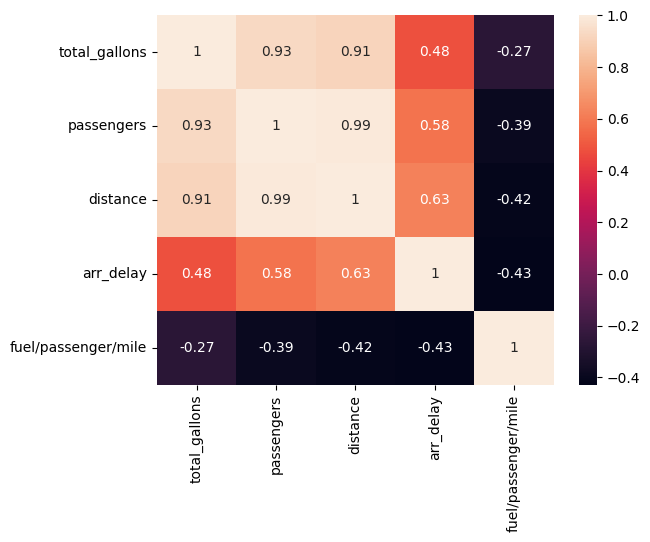

In [47]:
sns.heatmap(merge3.corr(),annot=True)

<AxesSubplot: xlabel='arr_delay', ylabel='fuel/passenger/mile'>

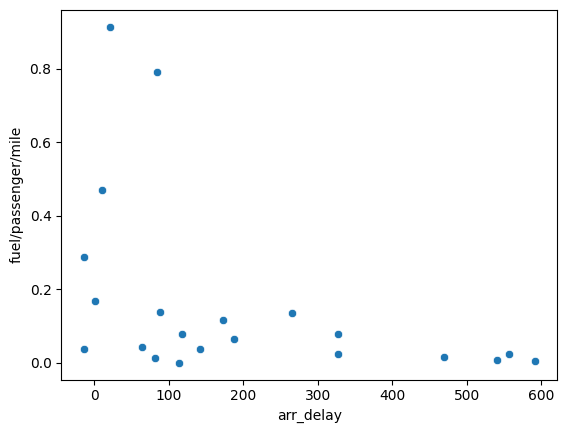

In [52]:
sns.scatterplot(merge3, x='arr_delay', y='fuel/passenger/mile')

In [50]:
merge3['fuel/passenger/mile'].corr(merge3['arr_delay'])

-0.42921663995385034